In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# ggplot2

## 几何对象

### 散点图

Warning message:
"package 'ggplot2' was built under R version 3.5.2"

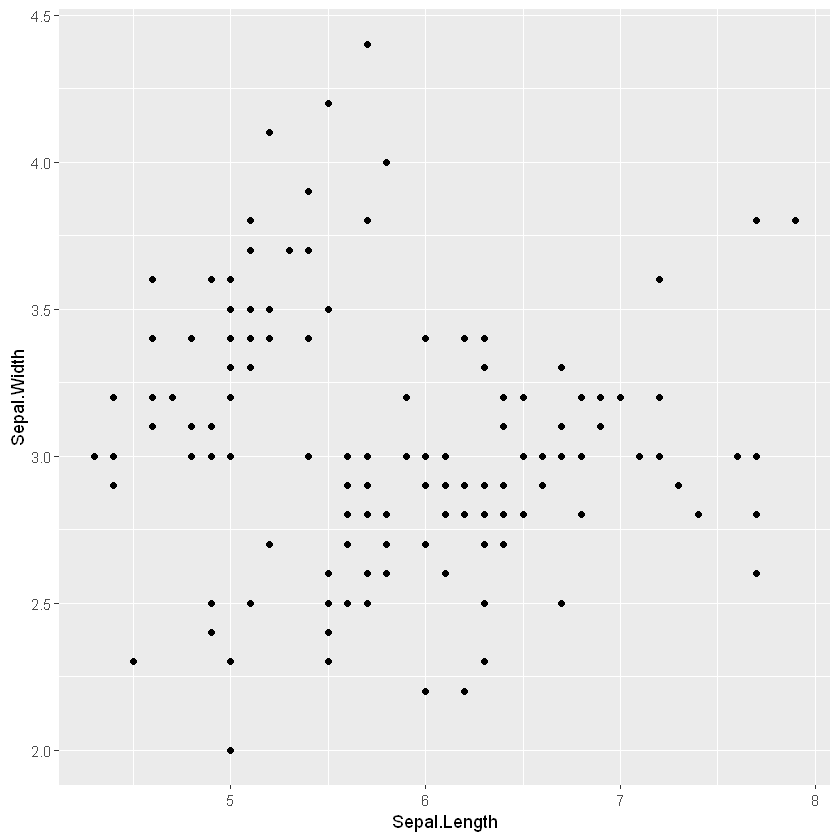

In [2]:
library(ggplot2)

# Make scatter plot of Sepal.Length and Sepal.Width
p.scatter = ggplot(iris) + geom_point(aes(x = Sepal.Length, y = Sepal.Width))
p.scatter

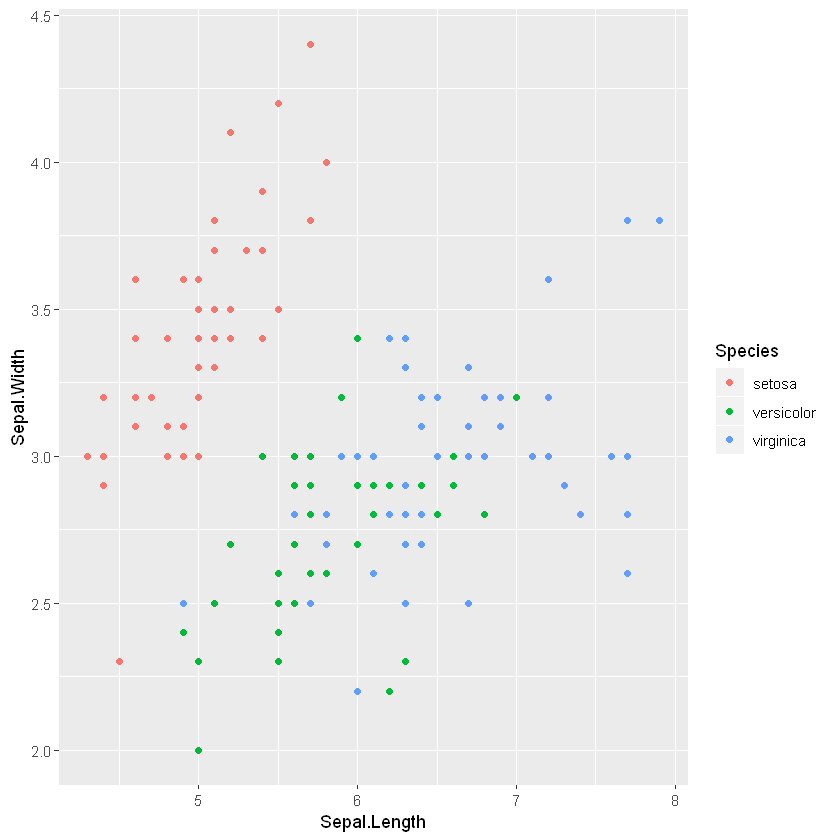

In [4]:
# One piece of information missing in the plots above is what species each plant is
p.scatter = ggplot(iris) + geom_point(aes(x=Sepal.Length, y=Sepal.Width, color=Species))
p.scatter

### 箱线图

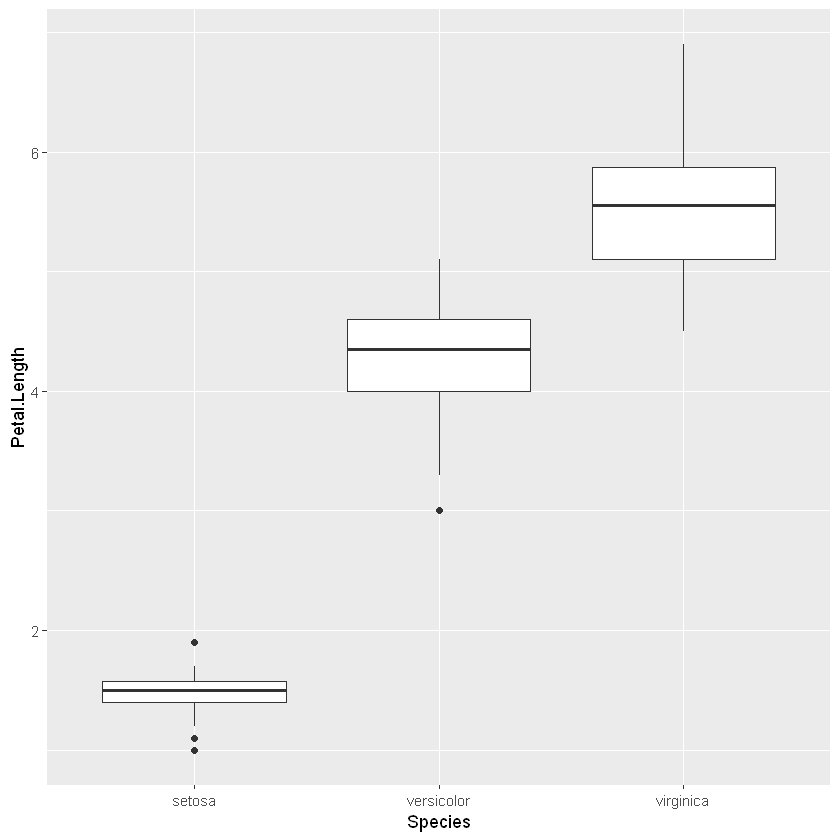

In [5]:
# Boxplot to explore numeric variable
p.box = ggplot(iris) + geom_boxplot(aes(x=Species, y=Petal.Length))
p.box

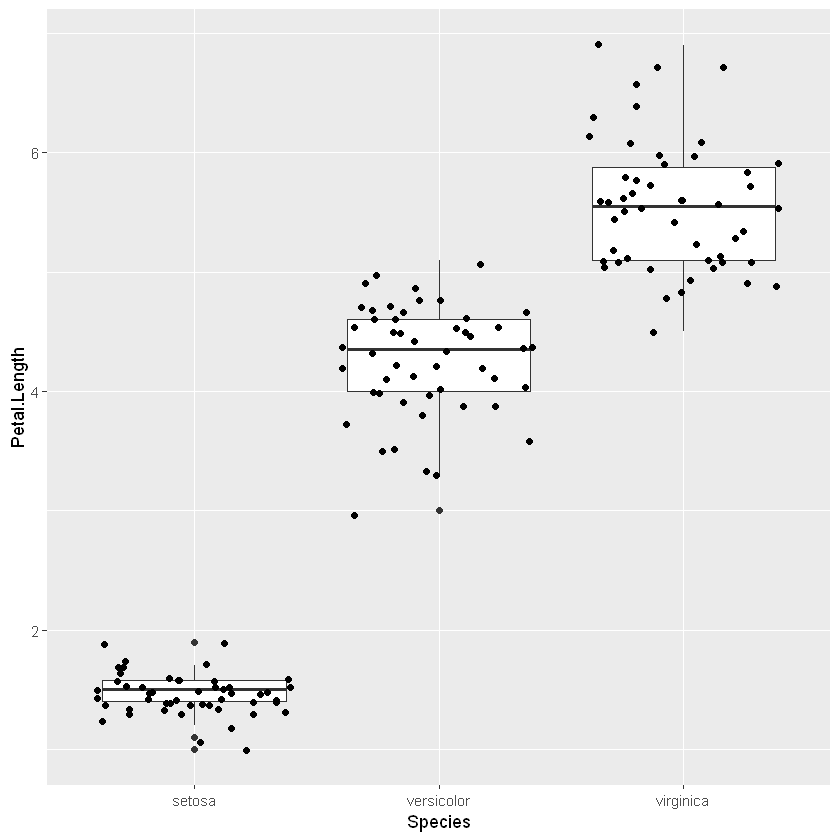

In [9]:
p.box.jitter = p.box + geom_jitter(aes(x=Species, y=Petal.Length))
p.box.jitter

### 提琴图

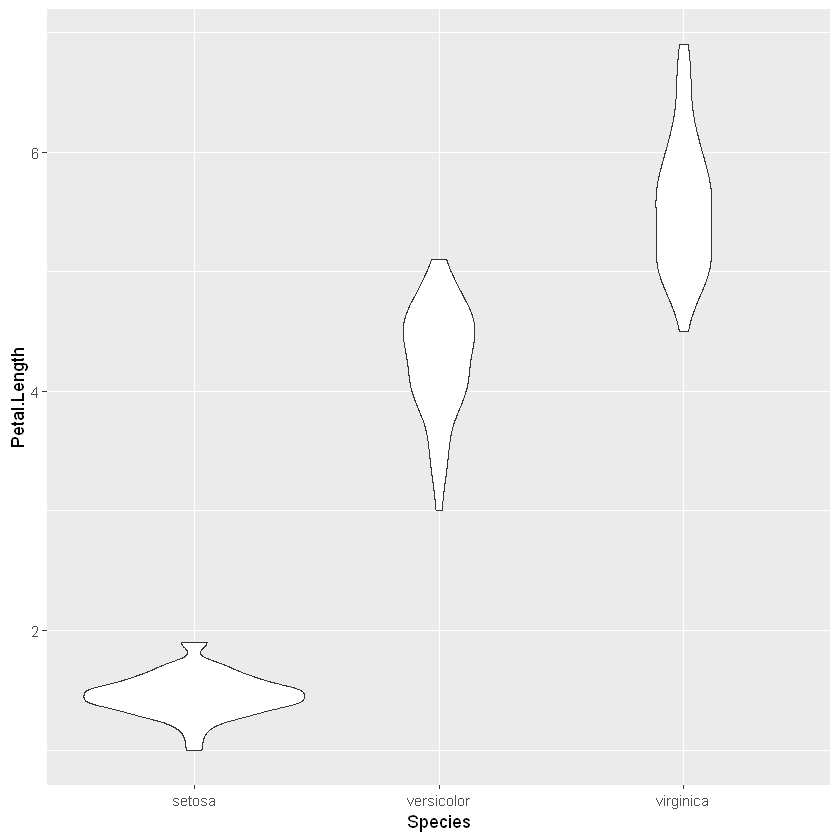

In [11]:
p.violin = ggplot(iris) + geom_violin(aes(x=Species, y=Petal.Length))
p.violin

### 密度图

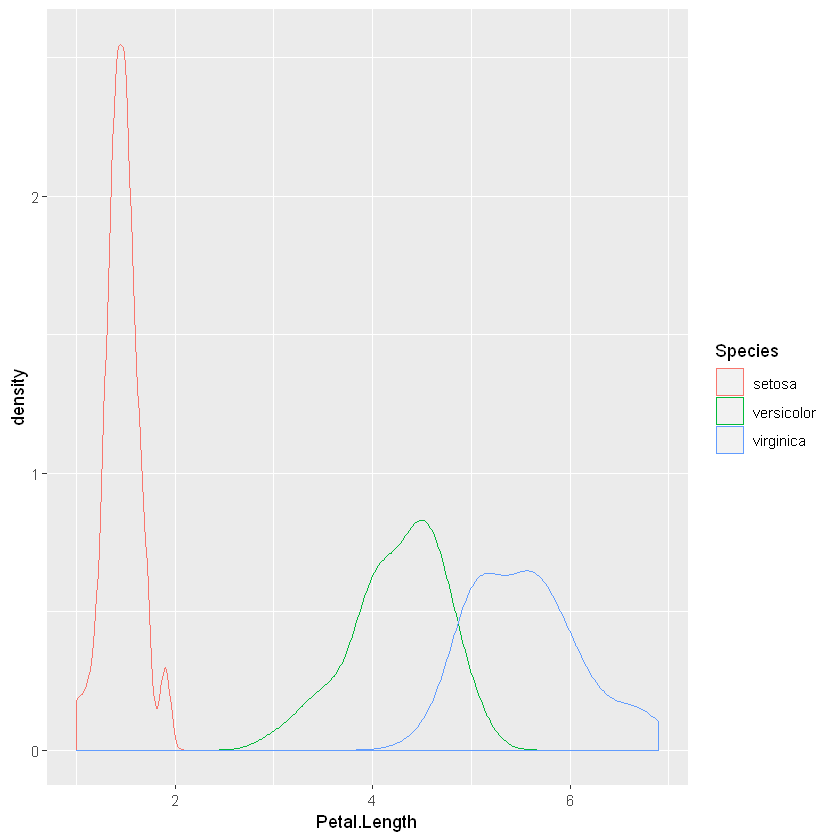

In [10]:
p.density = ggplot(iris) + geom_density(aes(x=Petal.Length, colour=Species)) 
p.density

### 时间序列
[参见此处](https://www.plob.org/article/10475.html)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


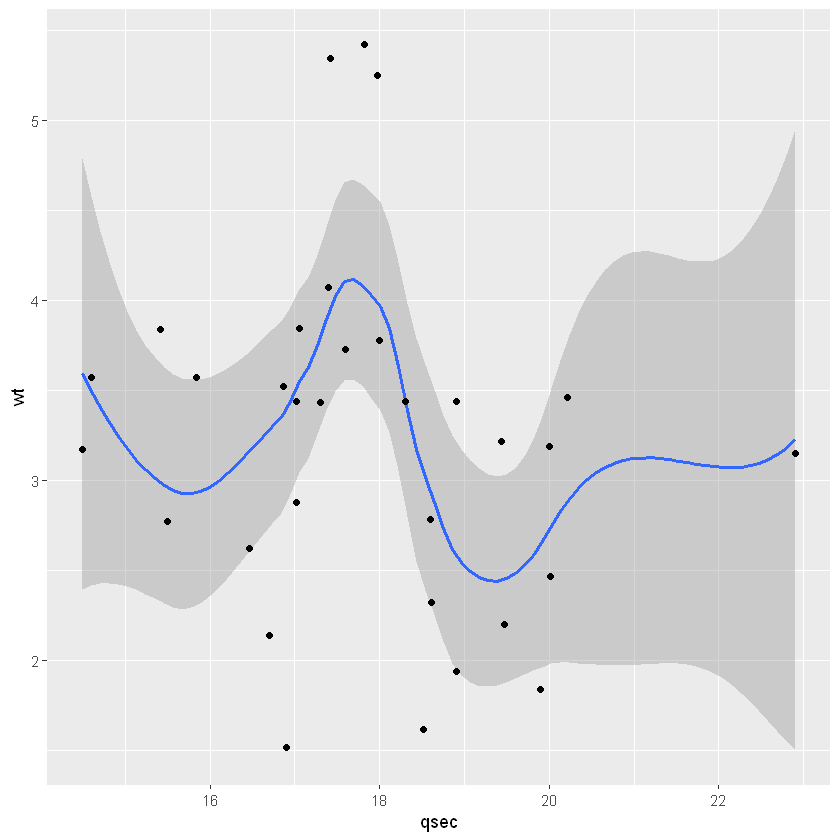

In [6]:
m <- ggplot(mtcars, aes(qsec, wt))
m + stat_smooth() + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


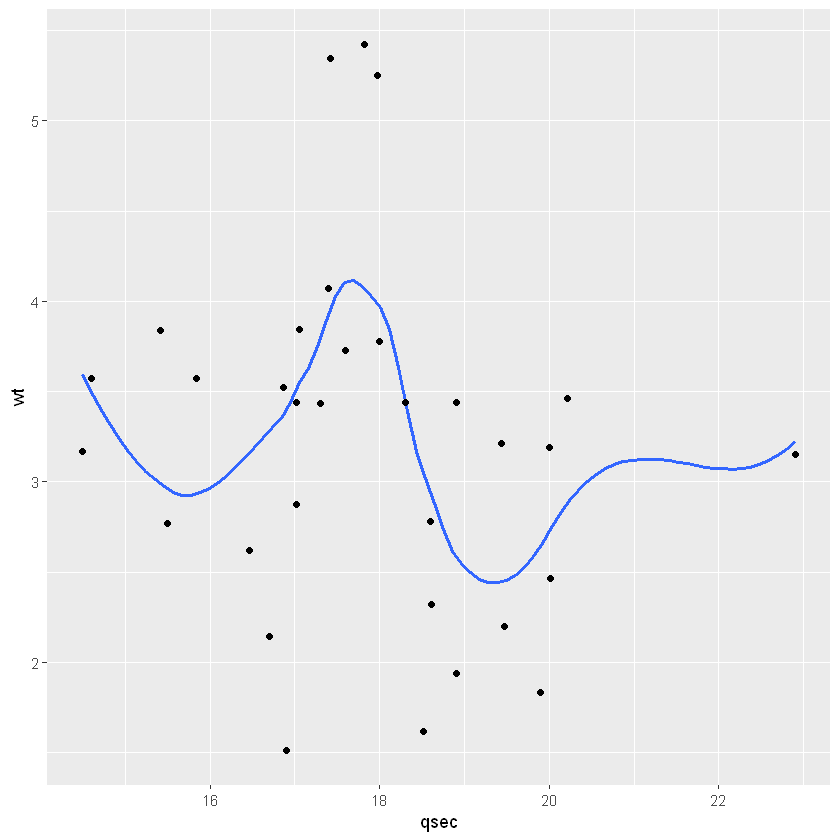

In [7]:
m + stat_smooth(se = FALSE) + geom_point()
 #取消默认的置信区间

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


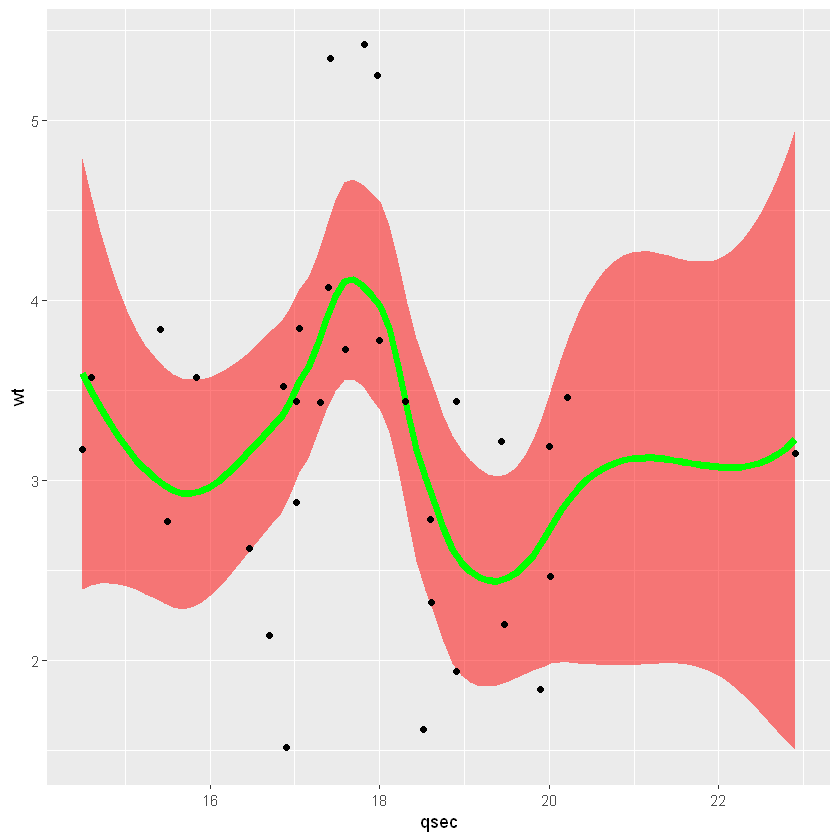

In [8]:
m + stat_smooth(fill = "red", size = 2, alpha = 0.5, color = "green") + geom_point()
#更改置信区间和线条颜色

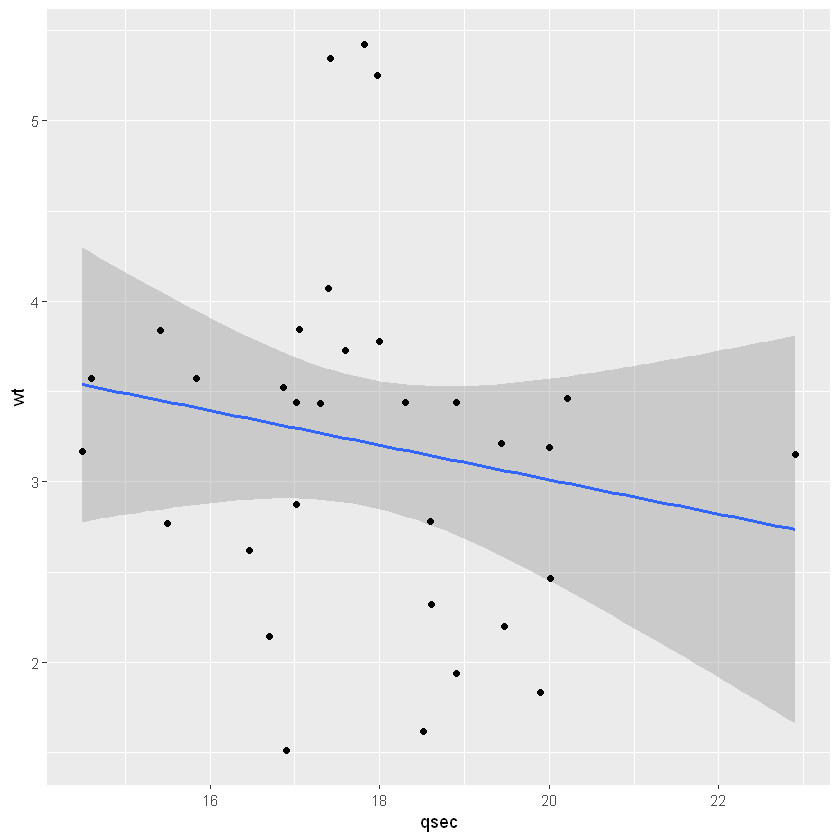

In [9]:
m + stat_smooth(method = "lm") + geom_point()
#用一元一次线性方程拟合

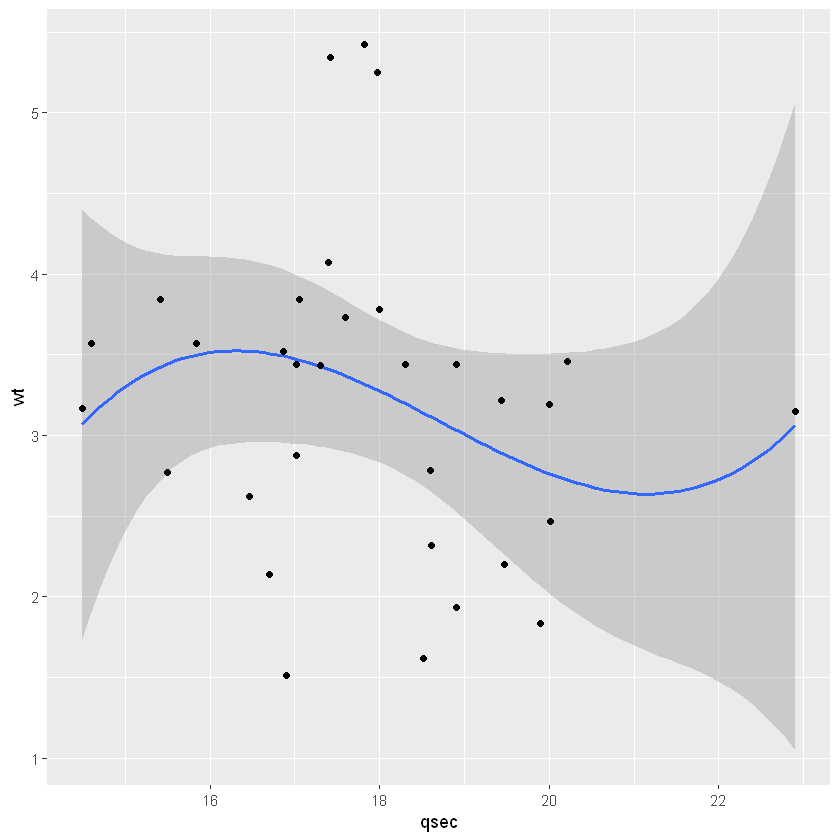

In [10]:
m + stat_smooth(method = "lm", formula = y ~ poly(x, 3)) + geom_point()
#使用一元二次方程拟合

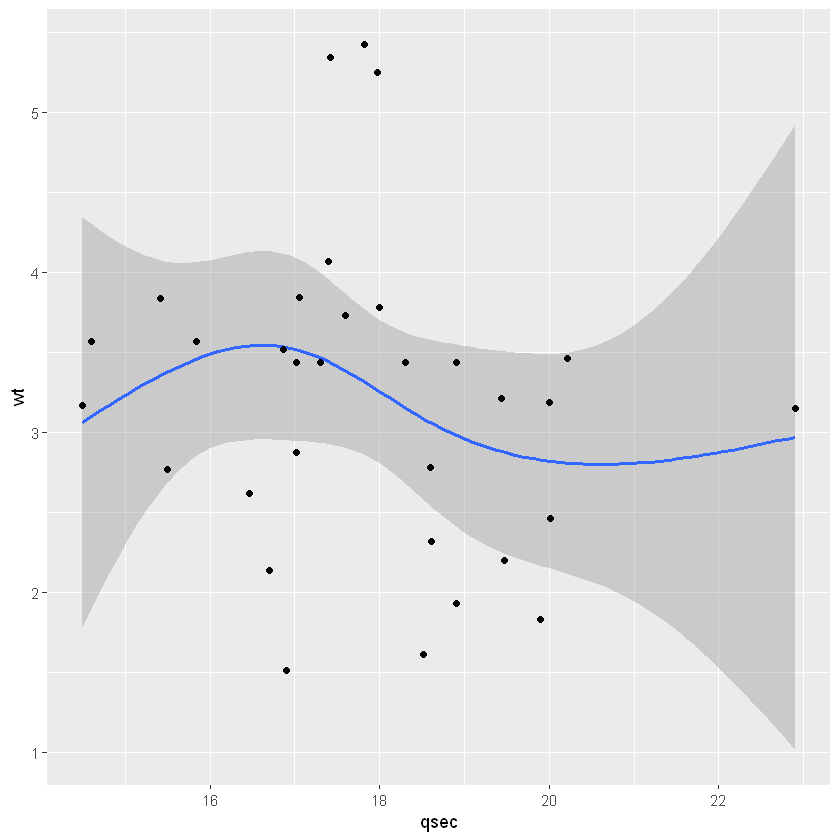

In [11]:
require(splines)
require(MASS)
m + stat_smooth(method = "lm", formula = y ~ ns(x, 3)) + geom_point()
# 加载splines和MASS包, 使用自由度为3的自然样条来进行拟合

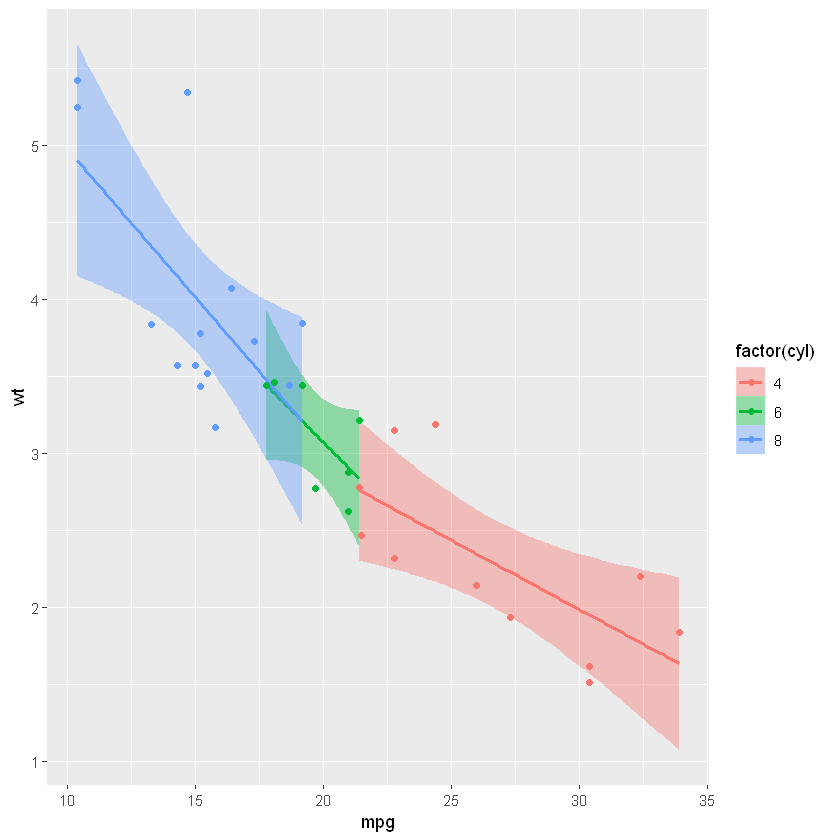

In [12]:
m <- ggplot(mtcars, aes(y = wt, x = mpg, group = factor(cyl)))
m + stat_smooth(method = lm, aes(color = factor(cyl), fill = factor(cyl))) + geom_point( aes(color = factor(cyl)))
#按cyl这个离散变量进行分组, 分别拟合数据

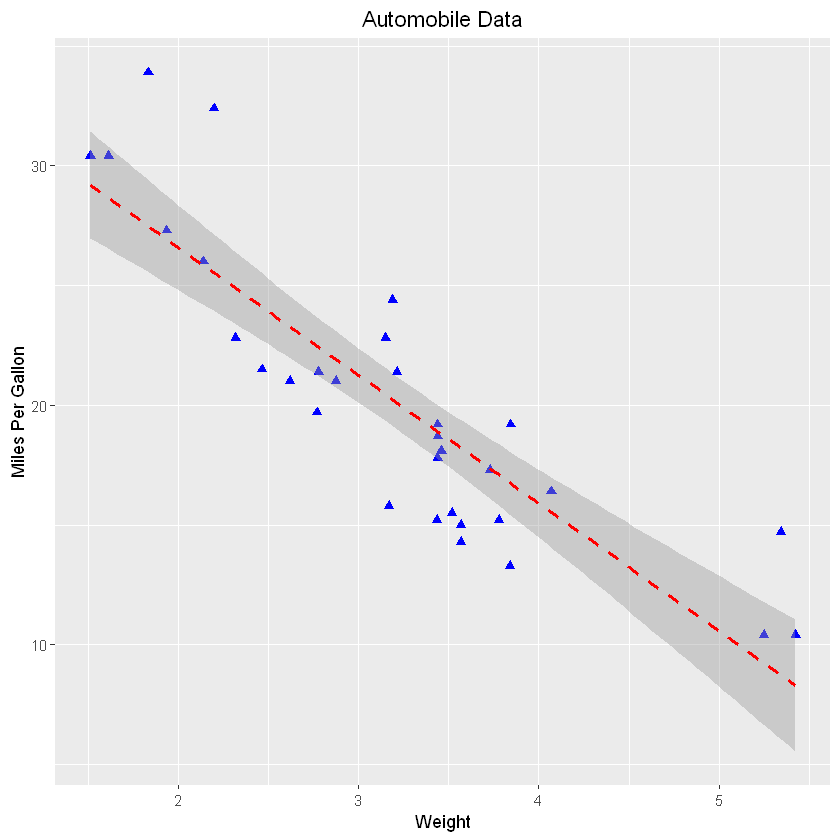

In [13]:
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
geom_point(pch = 17, color = "blue", size = 2) +   #设置形状，颜色，尺寸
geom_smooth(method = "lm", color = "red", linetype = 2, se = T) +  #显示95%的置信区间（默认se = T）
labs(title = "Automobile Data", x = "Weight", y = "Miles Per Gallon") +
theme(plot.title = element_text(hjust = 0.5))

曲线

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


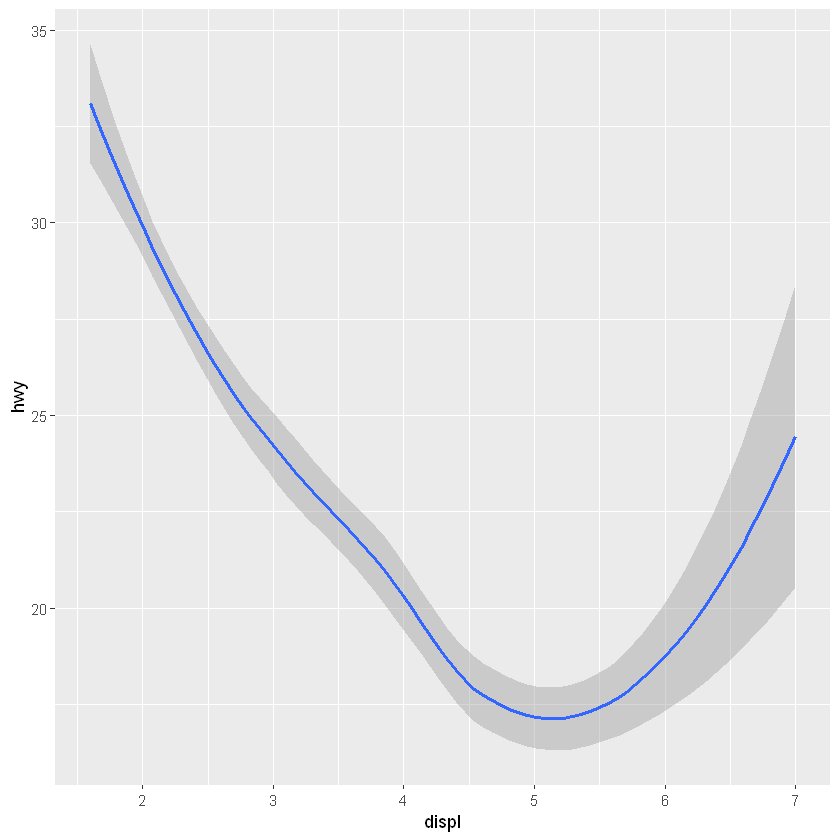

In [14]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


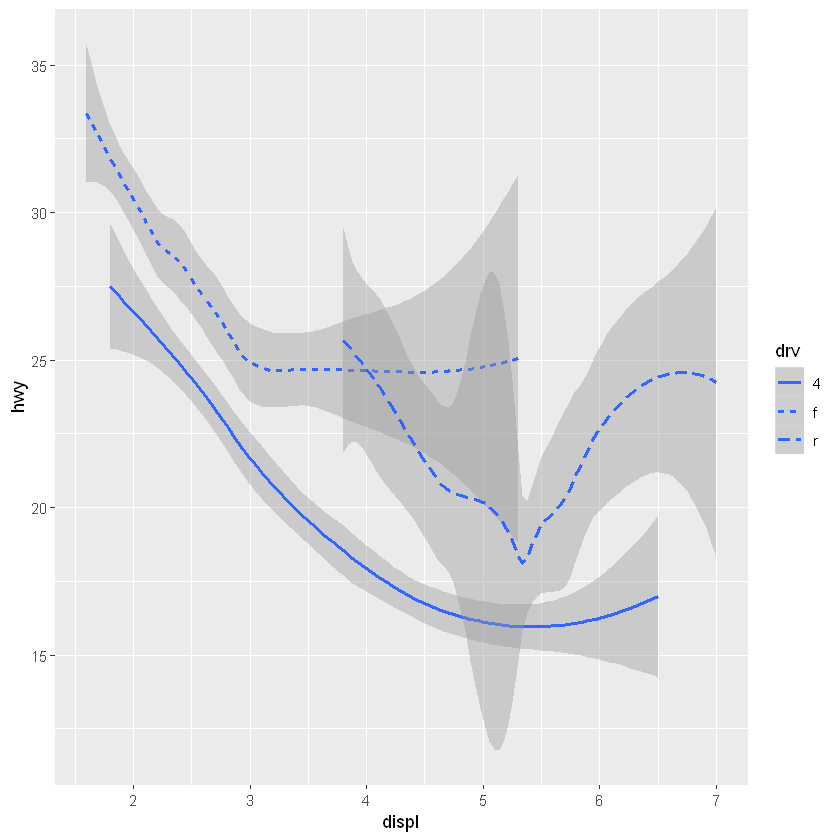

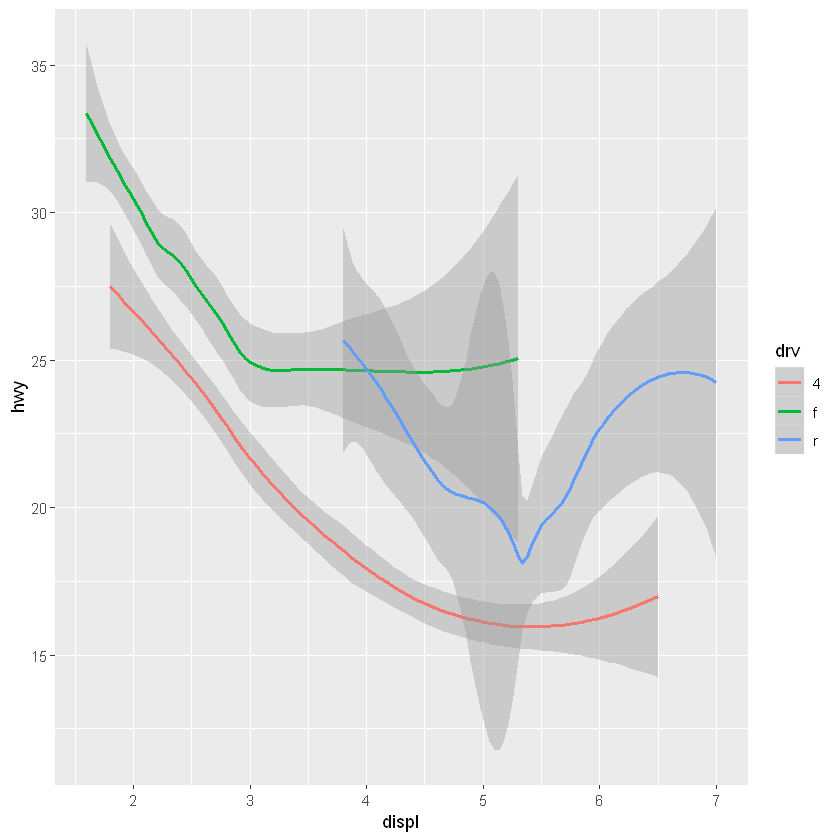

In [16]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, color = drv))    #改变颜色

多图层

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


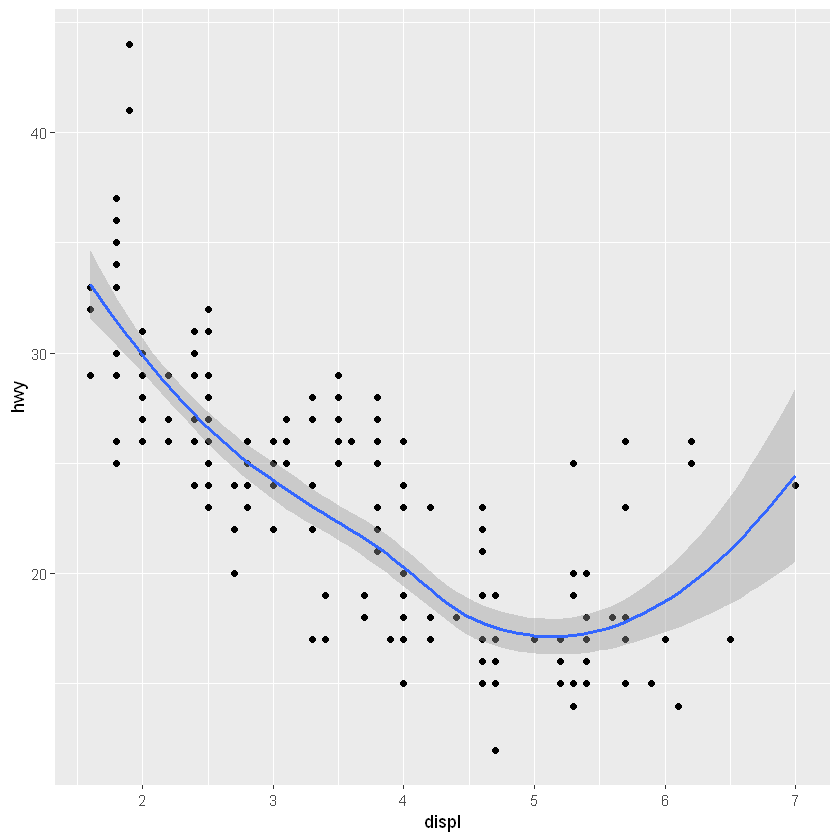

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

可以把映射关系加入ggplot()中，这样ggplot2就会把这个映射关系变成全局映射，这些映射就会在各个图层中执行

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


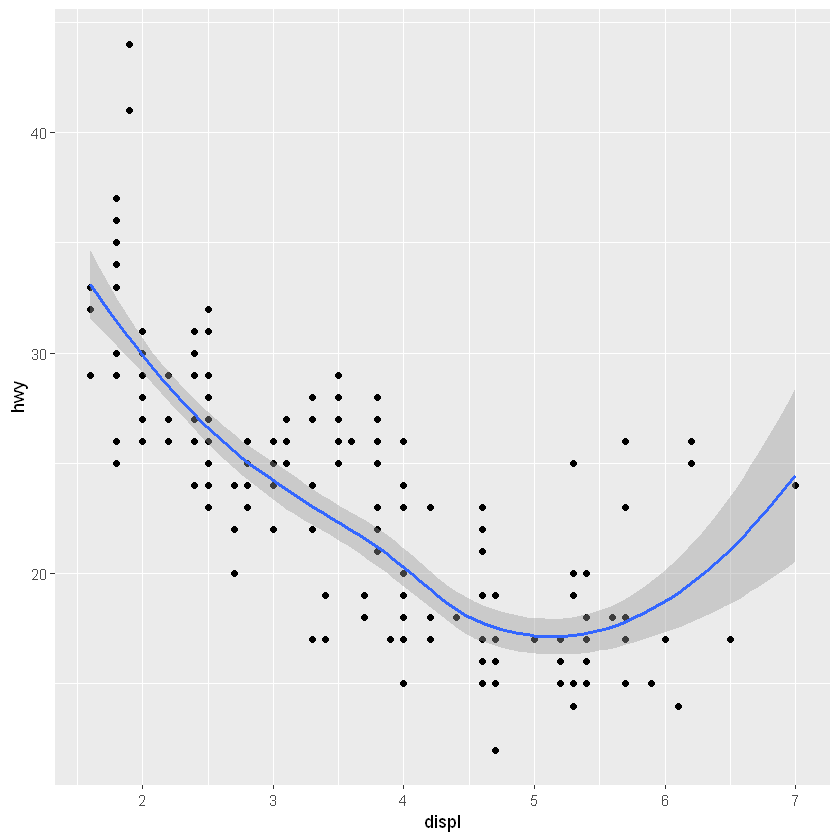

In [19]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

在图层中也加入一个映射，ggplot2会把这个映射关系设置为在本图层的局部映射，在本图层中，局部映射会覆盖和扩展全局映射

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


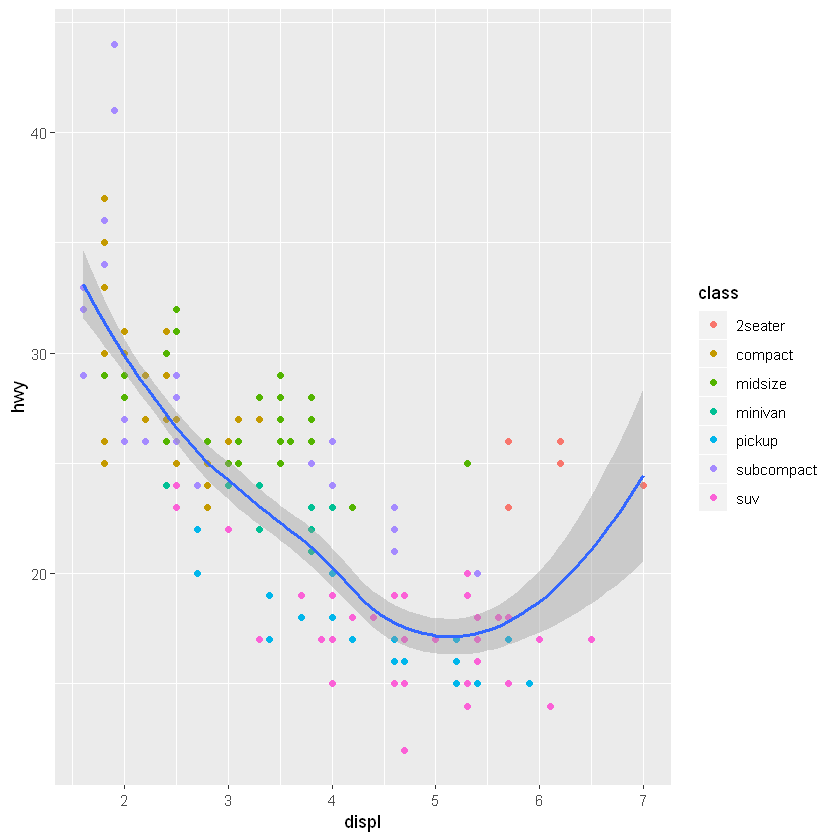

In [20]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()

## 分面与布局


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



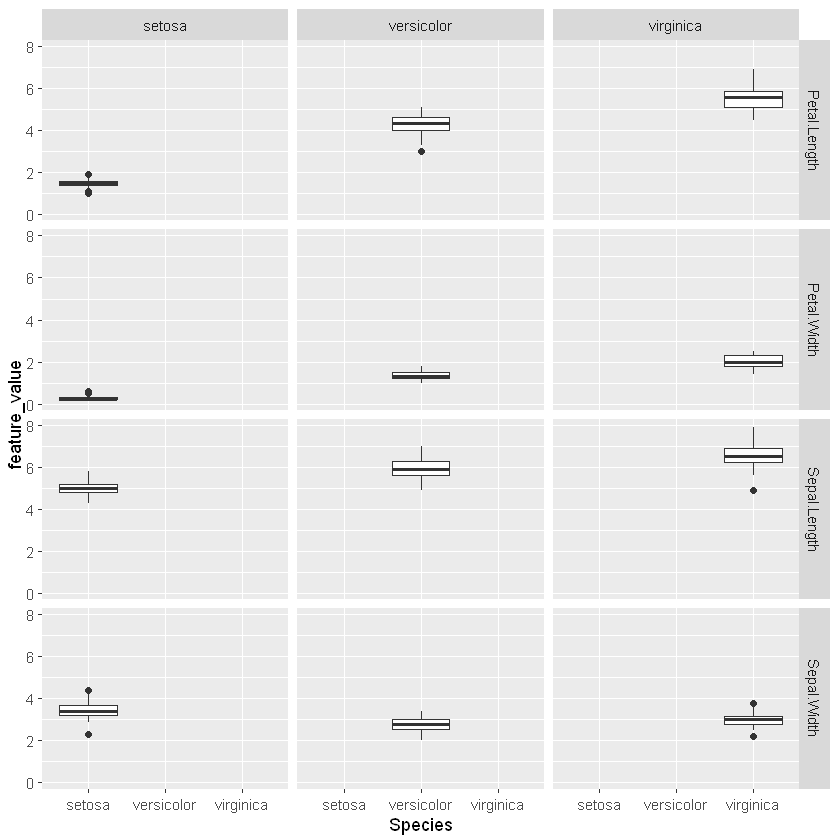

In [12]:
library(tidyr)
library(dplyr)
# 将数据变为tidy的
tidy_iris <- iris %>% 
  gather(feature_name, feature_value, one_of(c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width")))

p.box.facet <- ggplot(tidy_iris) + geom_boxplot(aes(x=Species, y=feature_value)) + facet_grid(feature_name~Species)
p.box.facet

## 标尺